In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)
%matplotlib inline

start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)





In [2]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

bank_stocks.columns.names=['Bank Ticker','Stock Info']

bank_stocks.head()



Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [3]:
for i in tickers:
    print('max close price:',i, bank_stocks[i]['Close'].max())
    

max close price: BAC 46.2013
max close price: C 466.812
max close price: GS 203.691
max close price: JPM 57.1634
max close price: MS 58.5624
max close price: WFC 47.0925


In [4]:
returns = pd.DataFrame()

for i in tickers:
    returns[i + ' returns'] = bank_stocks[i]['Close'].pct_change()


In [5]:
returns

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004101,0.001453,-0.002507,-0.001915,-0.003609,-0.004024
2015-12-28,-0.008110,-0.006245,-0.004702,-0.003286,-0.009601,-0.002472
2015-12-29,0.008633,0.011509,0.010432,0.010303,0.011815,0.011086


In [6]:
for i in tickers:
    print(i,' max return ',returns[i+' returns'].max()*100,"%")

BAC  max return  35.26894135111072 %
C  max return  57.836701200123095 %
GS  max return  26.46558553786653 %
JPM  max return  25.115205606545054 %
MS  max return  87.01656699964562 %
WFC  max return  32.74152249603728 %


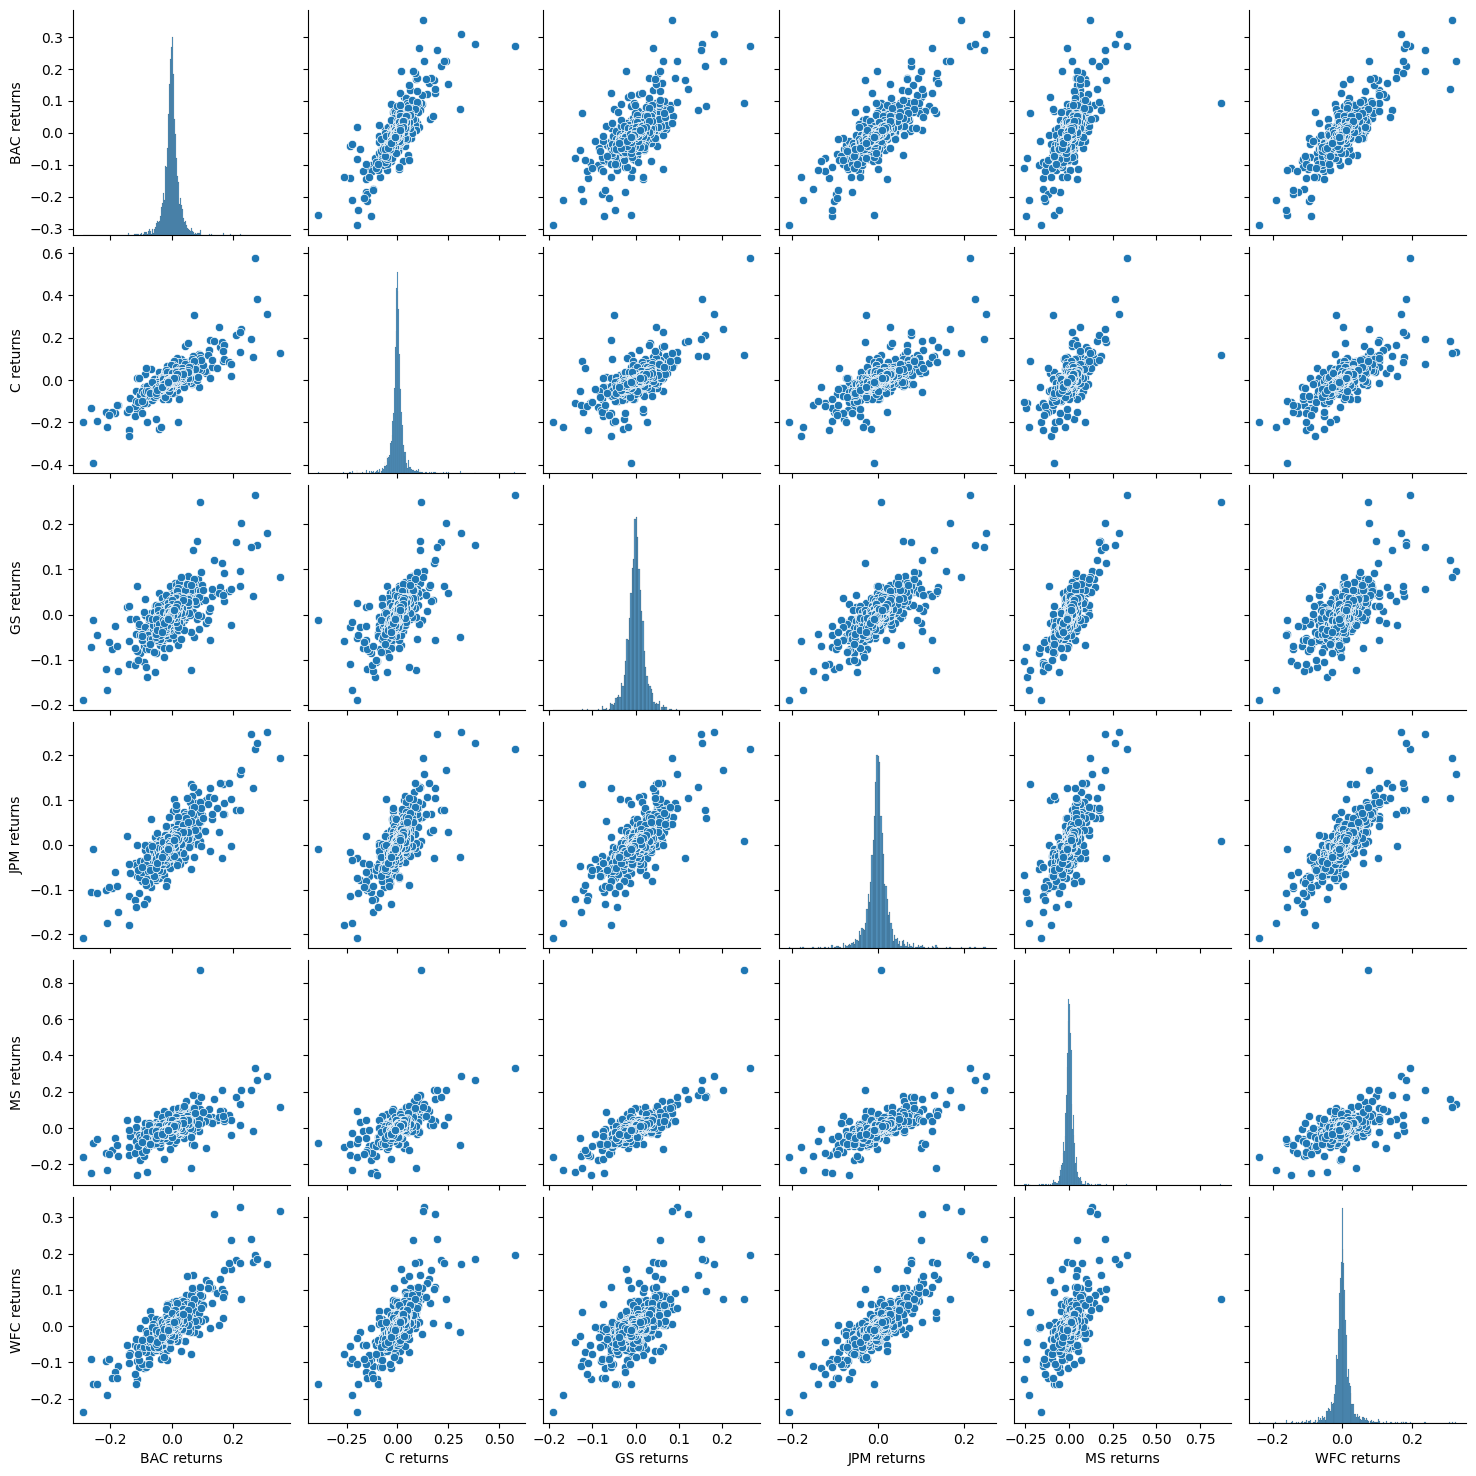

In [7]:
sns.pairplot(returns[1:])

In [8]:
returns.idxmin()

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [9]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

In [10]:
returns.std()

BAC returns    0.036605
C returns      0.038615
GS returns     0.025371
JPM returns    0.027670
MS returns     0.037708
WFC returns    0.030221
dtype: float64

In [11]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC returns    0.016149
C returns      0.015280
GS returns     0.014028
JPM returns    0.013964
MS returns     0.016006
WFC returns    0.012545
dtype: float64

<AxesSubplot:xlabel='JPM returns', ylabel='Count'>

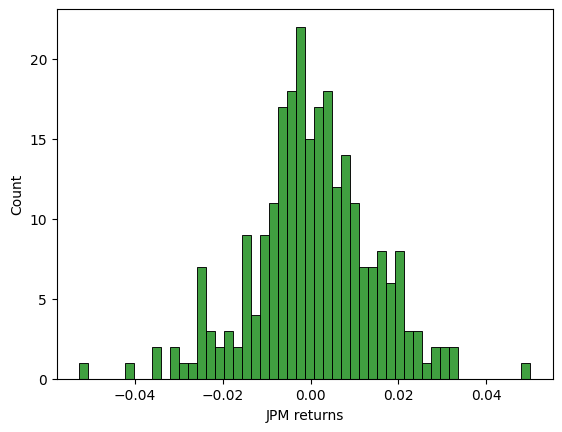

In [12]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['JPM returns'],color='green',bins=50)

<AxesSubplot:xlabel='C returns', ylabel='Count'>

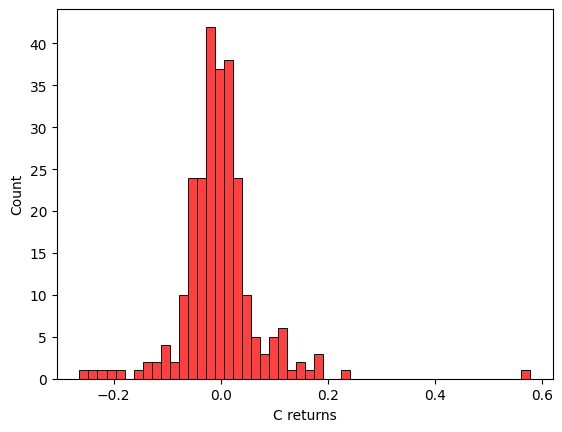

In [13]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C returns'],color='red',bins=50)

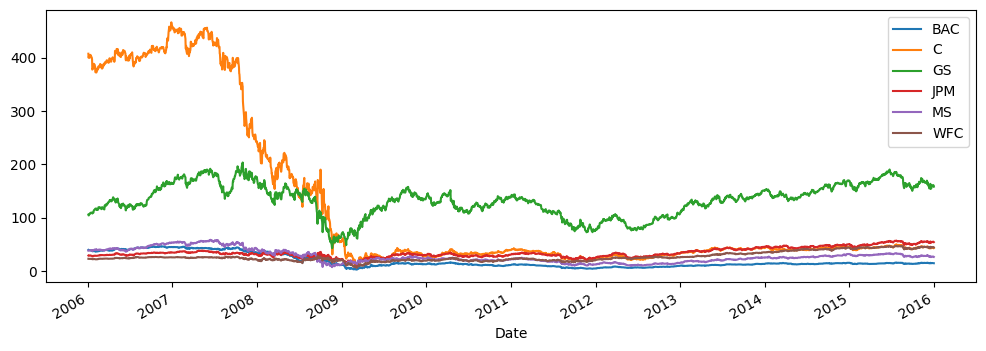

In [14]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()



https://stackabuse.com/using-plotly-library-for-interactive-data-visualization-in-python/

In [15]:
bank_stocks.xs(key='Close', axis = 1 , level='Stock Info').iplot()

In [18]:
C

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,43.3773,43.6426,43.1101,43.1101,1.353052e+07
2015-12-30,44.0205,44.1027,43.5291,43.5692,1.051787e+07
2015-12-29,43.9520,44.3357,43.9344,44.1369,1.218830e+07
2015-12-28,43.7934,43.7934,43.2863,43.6347,1.051593e+07
2015-12-24,43.7209,44.1281,43.6954,43.9089,5.607320e+06
...,...,...,...,...,...
2006-01-09,402.1740,403.3290,399.6780,400.4320,2.031072e+06
2006-01-06,404.5040,404.6410,398.8650,402.3210,1.655812e+06
2006-01-05,400.8430,403.6630,400.5200,402.3210,1.371893e+06


C:\Users\AMAL ANTONY\AppData\Local\Temp\ipykernel_17272\2608257001.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.

C:\Users\AMAL ANTONY\AppData\Local\Temp\ipykernel_17272\2608257001.py:3: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



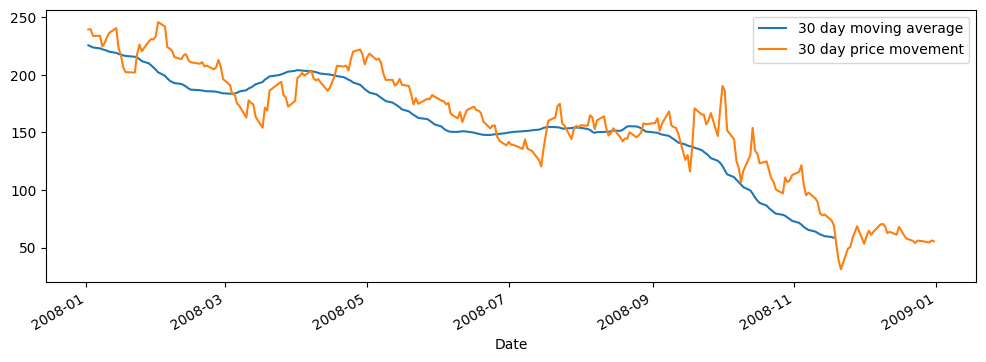

In [37]:
plt.figure(figsize=(12,4))
C.loc['2008-01-01':'2008-12-31']['Close'].rolling(window=30).mean().plot(label='30 day moving average')
C['Close'].loc['2008-01-01':'2008-12-31'].plot(label='30 day price movement')
plt.legend()


In [38]:
bank_stocks.xs(key='Close', axis = 1 , level='Stock Info').corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

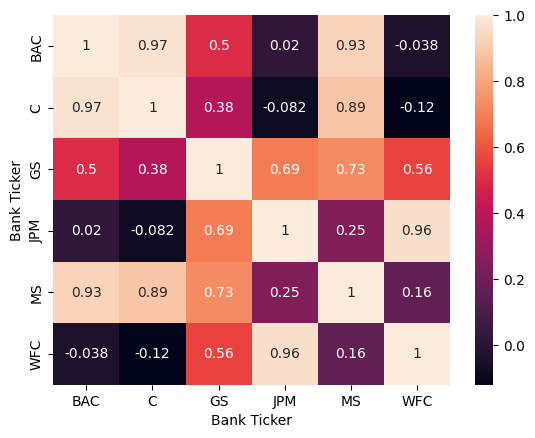

In [40]:
sns.heatmap(bank_stocks.xs(key='Close', axis = 1 , level='Stock Info').corr(),annot=True)